In [1]:
from tensorflow.keras.layers import Input, DepthwiseConv2D, \
     Conv2D, BatchNormalization, ReLU, AvgPool2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

In [2]:
def mobilenet_block(x, filters, strides):
    x = DepthwiseConv2D(kernel_size=3, strides = strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters=filters, kernel_size=1, strides = 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    return x

In [3]:
#Model Stem
input = Input(shape=(224,224,3))
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)

In [4]:
x = mobilenet_block(x, filters=64, strides=1)
x = mobilenet_block(x, filters=128, strides=2)
x = mobilenet_block(x, filters=128, strides=1)

In [5]:
x = mobilenet_block(x, filters=256, strides=2)
x = mobilenet_block(x, filters=256, strides=1)

In [6]:
x = mobilenet_block(x, filters=512, strides=2)
for i in range(5):
    x = mobilenet_block(x, filters=512, strides=1)

In [7]:
x = mobilenet_block(x, strides=2, filters=1024)
x = mobilenet_block(x, strides=1, filters=1024)
x = AvgPool2D(pool_size=7, strides=1)(x)
output = Dense(units=1000, activation='softmax')(x)


In [10]:
model = Model(input, output, name='MobileNet')

In [11]:
model.summary()

Model: "MobileNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 32)      0 

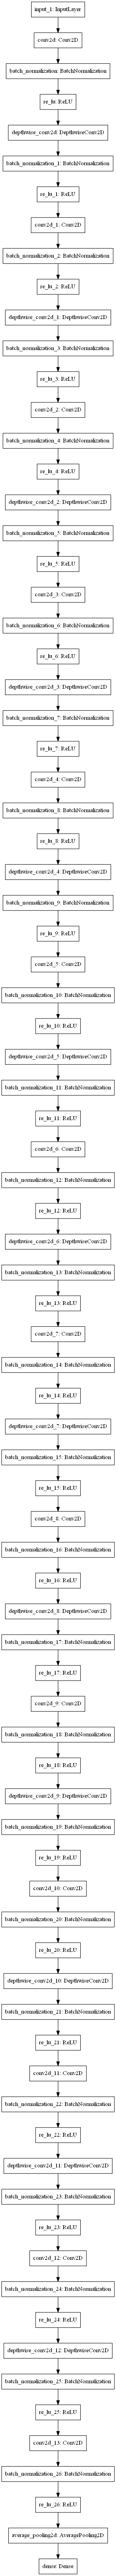

In [12]:
plot_model(model)